In [38]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [48]:
X = 3
MOMENTUM = -0.03
CYCLE = 1000
STEPSIZE = -0.01

In [49]:
def objective(v: np.array) -> np.array:
    return(np.power(v, 2))

In [50]:
def derivative(v: np.array) -> np.array:
    return(np.dot(2, v))

In [51]:
def distance(v: np.array, w: np.array) -> float:
    v = np.subtract(v, w)
    return(np.power((np.dot(v, v)), 0.5))

[ 0.05861654  2.04559822 -6.44729257]
[3.43589896e-03 4.18447206e+00 4.15675815e+01]


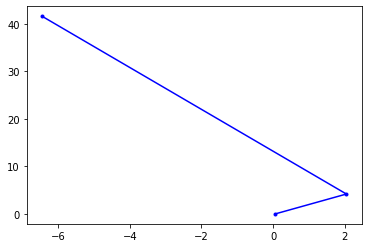

In [57]:
def gradient_step(v: np.array, gradient: np.array, prev_step: np.array):
    #Движемся с шагом step_size в напрвлении градиента "gradient" от "v"
    assert len(v) == len(gradient)
    
    step = np.add(np.dot(STEPSIZE, gradient), np.dot(MOMENTUM, prev_step))
    return([step, np.add(step, v)])


v = np.array([random.uniform(-10, 10) for i in range(X)]) #случайная отправная точка
results = objective(v)
print(v)
print(results)

# create a line plot of input vs result
plt.plot(v, results,  '.-', color='blue')
# show the plot
plt.show()

In [58]:
res = np.empty((0, X), float)
scores = np.empty((0, X), float)
prev_step = np.zeros(X)

for epoch in range(CYCLE):
    grad = derivative(v) #вычисляем градиент в v
    step, v = gradient_step(v, grad, prev_step) #делаем отрицательный градиентный шаг с моментной модификацией, берем умереннный
    res = np.append(res, [v], axis=0)
    scores = np.append(scores, [step], axis=0)
    prev_step = step
    print(v)


[ 0.05744421  2.00468625 -6.31834672]
[ 0.0563305   1.96581988 -6.19584816]
[ 0.0552373   1.92766948 -6.07560616]
[ 0.05416535  1.8902606  -5.95770129]
[ 0.0531142   1.85357766 -5.84208441]
[ 0.05208345  1.81760659 -5.72871123]
[ 0.0510727   1.78233359 -5.6175382 ]
[ 0.05008157  1.74774511 -5.50852263]
[ 0.04910967  1.71382786 -5.40162265]
[ 0.04815664  1.68056882 -5.29679719]
[ 0.0472221   1.64795522 -5.19400601]
[ 0.04630569  1.61597452 -5.09320963]
[ 0.04540707  1.58461445 -4.99436933]
[ 0.04452589  1.55386296 -4.89744715]
[ 0.0436618   1.52370825 -4.80240587]
[ 0.04281449  1.49413873 -4.70920899]
[ 0.04198362  1.46514304 -4.61782072]
[ 0.04116887  1.43671005 -4.52820595]
[ 0.04036994  1.40882884 -4.44033028]
[ 0.03958651  1.38148869 -4.35415994]
[ 0.03881828  1.35467913 -4.26966185]
[ 0.03806496  1.32838983 -4.18680356]
[ 0.03732626  1.30261071 -4.10555324]
[ 0.0366019   1.27733187 -4.02587968]
[ 0.03589159  1.2525436  -3.94775229]
[ 0.03519507  1.22823638 -3.87114107]
[ 0.03451206

In [59]:
print(distance(v, np.zeros(X)) < 0.001)

True


In [60]:
print(distance(v, np.zeros(X))) #минимум функции sum_of_squares находится в нуле, v-min получился 2.30 * 10^(-8) ≈ 0 (0.00000000238...)

2.0848262172134687e-08


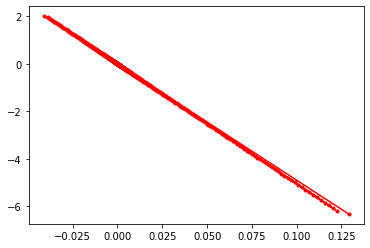

In [61]:
# plot the solutions found
for i in range(CYCLE):
    plt.plot(scores[i], res[i], '.-', color='red')
# show the plot
plt.show()